In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file_url = 'bbc-text.csv'
df = pd.read_csv(file_url)

In [3]:
print(df.columns,df.shape,'\n', df.category.unique(),'\n',df.sample(5))

Index(['category', 'text'], dtype='object') (2225, 2) 
 ['tech' 'business' 'sport' 'entertainment' 'politics'] 
            category                                               text
426           sport  bortolami predicts dour contest italy skipper ...
2162           tech  who do you think you are  the real danger is n...
277   entertainment  band aid retains number one spot the charity s...
2189           tech  mobile networks seek turbo boost third-generat...
1741           tech  us state acts to stop  spammers  us state texa...


C:\Users\goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

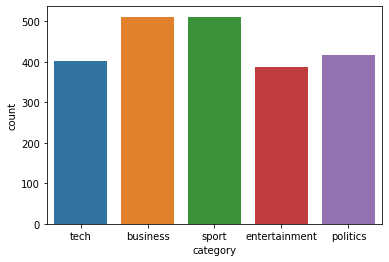

In [4]:
sns.countplot(df.category)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [7]:
def getReviewFromIndex(index):
    example = df[df.index == index][['category', 'text']].values[0]
    if len(example) > 0:
        print(example[0])
        print(example[1])

In [8]:
getReviewFromIndex(12)

business
crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low. fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november. a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday. opec members said on tuesday that it saw no reason to cut its output.  although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48.  brent crude also rose in london trading  adding $1.89 to $48.62 at the close. much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflat

In [9]:
import keras 
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re


In [10]:
import nltk 

In [11]:
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))


In [12]:
#cleaning the text 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
  
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text'] = df['text'].apply(clean_text)

In [13]:
getReviewFromIndex(1000)

politics
parties warned grey vote political parties cannot afford take older uk voters granted coming election says age concern survey charity suggests 69 over55s say always vote general election compared 17 18 24 year olds charity boss gordon lishman said decisive blow struck election would older voters could relied turn total 3 028 adults aged 18 interviewed study mr lishman urged net government boost state pension also called measures combat ageism build effective public services support us ageing society older people want see manifesto commitments make difference lives mr lishman said political parties must wake fact unless address demands concerns older people keep attract vote survey carried icm research 14 people aged 18 34 said never voted general elections among over65s 70 said would certain vote immediate election compared 39 people 55 age concern says over55s united around key areas policy want government focus 57 pensions nhs key issues economy important third ta crucial ar

In [14]:
max_words=50000
max_text_len=200
embedding_dim=100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


In [15]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=max_text_len)
print('Shape of data tensor is', X.shape)

Shape of data tensor is (2225, 200)


In [ ]:
tokenizer.get_config()

In [26]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)
#splitting data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



Shape of label tensor: (2225, 5)
(2002, 200) (2002, 5)
(223, 200) (223, 5)


In [34]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          5000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
epochs=10 
batch_size=128
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='accuracy', patience=3, min_delta=0.0001)])


Epoch 1/10
15/15 [==============================] - 10s 588ms/step - loss: 1.6006 - accuracy: 0.2737 - val_loss: 1.5675 - val_accuracy: 0.3781
Epoch 2/10
15/15 [==============================] - 8s 564ms/step - loss: 1.3726 - accuracy: 0.4092 - val_loss: 1.1198 - val_accuracy: 0.4925
Epoch 3/10
15/15 [==============================] - 9s 593ms/step - loss: 0.9154 - accuracy: 0.6135 - val_loss: 0.8531 - val_accuracy: 0.6418
Epoch 4/10
15/15 [==============================] - 9s 616ms/step - loss: 0.7549 - accuracy: 0.6818 - val_loss: 0.7985 - val_accuracy: 0.6866
Epoch 5/10
15/15 [==============================] - 9s 632ms/step - loss: 0.6207 - accuracy: 0.7973 - val_loss: 0.7147 - val_accuracy: 0.8358
Epoch 6/10
15/15 [==============================] - 10s 655ms/step - loss: 0.4112 - accuracy: 0.8923 - val_loss: 0.3960 - val_accuracy: 0.9254
Epoch 7/10
15/15 [==============================] - 10s 679ms/step - loss: 0.1752 - accuracy: 0.9789 - val_loss: 0.2027 - val_accuracy: 0.9502
Epo

In [37]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 0s 22ms/step - loss: 0.2273 - accuracy: 0.9417
Test set
  Loss: 0.227
  Accuracy: 0.942
